In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ***datset1 and*** **train** \

---------------------------



In [ ]:
tweet_df1 = pd.read_csv('/content/data1set.csv')

In [ ]:
twt2_df=pd.read_csv('/content/train.csv')

size checking-----------------

In [ ]:
print(twt2_df.shape,tweet_df1.shape)

(31962, 3) (8817, 2)


In [ ]:
tweet_df1.head()

,label_bullying,text_message
0,0,yeah I got 2 backups for all that. I just hate...
1,0,I hate using my BB but love my iPhone. Haven'...
2,1,Get fucking real dude.
3,1,She is as dirty as they come and that crook ...
4,1,why did you fuck it up. I could do it all day...


In [ ]:
twt2_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
tweet_df1.columns=['label','tweet']

In [ ]:
twt2_df.pop('id')

In [ ]:
print(tweet_df1.shape,twt2_df.shape)

(8817, 2) (31962, 2)


In [ ]:
print(tweet_df1['label'].value_counts(),'\n',twt2_df['label'].value_counts())

0    6312
1    2505
Name: label, dtype: int64 
 0    29720
1     2242
Name: label, dtype: int64


# New set *data.csv* 

---------------------------



In [ ]:
data = pd.read_csv('/content/data.csv', sep='\t', header=None)

In [ ]:
data.columns=['id','tweet','label']

In [ ]:
data.pop('id')

In [ ]:
for i in range(data.shape[0]):
  if data['label'].iloc[i]=='none':
    data['label'].iloc[i]=0
  else:
    data['label'].iloc[i]=1


In [ ]:
print(data)

In [ ]:
print(tweet_df1['label'].value_counts(),'\n',twt2_df['label'].value_counts(),'\n',data['label'].value_counts())

0    6312
1    2505
Name: label, dtype: int64 
 0    29720
1     2242
Name: label, dtype: int64 
 0    11006
1     5044
Name: label, dtype: int64


# **new sets dataapk and dataset**

-------------------------



In [ ]:
dataapk=pd.read_csv('/content/dataapk.csv')

In [ ]:
dataapk.head()

,Unnamed: 0,is_offensive,new_text
0,0,0,go village pump suggest change language rfc set
1,1,1,anti greek nationalis wikipedia hi alexikoua y...
2,2,1,dis hoe wasnt dis violent lottery ticket
3,3,0,better atabay helping banned vandals pushing pov
4,4,0,camelcase sicko camelcase camelcase rule r bal...


In [ ]:
dataapk.columns=['id','label','tweet']

In [ ]:
dataapk.pop('id')

In [ ]:
dataapk.head()

,label,tweet
0,0,go village pump suggest change language rfc set
1,1,anti greek nationalis wikipedia hi alexikoua y...
2,1,dis hoe wasnt dis violent lottery ticket
3,0,better atabay helping banned vandals pushing pov
4,0,camelcase sicko camelcase camelcase rule r bal...


In [ ]:
dataapk['label'].value_counts()

0    147509
1     36845
Name: label, dtype: int64

In [ ]:
datanew=pd.read_csv('/content/dataset.csv')

In [ ]:
datanew.head()

,Comment,Insult
0,"""You fuck your dad.""",1
1,"""i really don't understand your point.\xa0 It ...",0
2,"""A\\xc2\\xa0majority of Canadians can and has ...",0
3,"""listen if you dont wanna get married to a man...",0
4,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",0


In [ ]:
datanew.columns=['tweet','label']

In [ ]:
datanew.shape

In [ ]:
datanew.head()

In [ ]:
datanew['label'].value_counts()

0    4852
1    1742
Name: label, dtype: int64

# ***New set cyberbullying tweets***

---



In [ ]:
#cyb_twt=pd.read_csv('/content/cyberbullying_tweets.csv')

In [ ]:
#cyb_twt.columns=['tweet','label']

# Total values***:

-----------------------------------



In [ ]:
print(dataapk['label'].value_counts())
print(datanew['label'].value_counts())


0    147509
1     36845
Name: label, dtype: int64
0    4852
1    1742
Name: label, dtype: int64


In [ ]:
print(tweet_df1['label'].value_counts())
print(twt2_df['label'].value_counts())
print(data['label'].value_counts())

0    6312
1    2505
Name: label, dtype: int64
0    29720
1     2242
Name: label, dtype: int64
0    11006
1     5044
Name: label, dtype: int64


# ***final1 set***

-------------



# ***# combine nly 1's from tweet***

-------------------------------



In [ ]:
tweet_dff=tweet_df1[tweet_df1['label']==1]
tweet_dff

# *only ones from dataapk*

---



In [ ]:
dataapk_ones=dataapk[dataapk['label']==1]
dataapk_ones

# ***Combine-------------------only 1's from twt2***

----------------------



In [ ]:
twt_df3=twt2_df[twt2_df['label']==1]
twt_df3

# ***Final2 combine***

---



In [ ]:
tweet_df = pd.concat([tweet_df1,data,datanew,dataapk_ones,twt_df3])

In [ ]:
#tweet_df.append(twt2_df,ignore_index=True)

In [ ]:
tweet_df.head()

In [ ]:
print(tweet_df.shape,tweet_df1.shape,twt2_df.shape)

(54498, 2) (8817, 2) (31962, 2)


In [ ]:
print(tweet_df['label'].value_counts())

1    48378
0    22170
Name: label, dtype: int64


# **to** download only

In [ ]:
from google.colab import files
tweet_df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# code-------------------------------------------------------

In [ ]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

yeah I got 2 backups for all that. I just hate when that happen. I been strugglin for a week now...handle that tho 

I hate using my BB  but love my iPhone. Haven't tried the new BB. My BB is provided by my corp. I don't get to pick which model 

 Get fucking real dude. 

 She is as dirty as they come  and that crook Rengel  the Dems are so fucking corrupt it's a joke. Make Republicans look like  ... 

 why did you fuck it up. I could do it all day too. Let's do it when you have an hour. Ping me later to sched writing a book here. 



In [ ]:
def data_processing(tweet):
    tweet = re.sub("\d*\.\d+","",str(tweet))
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub("\d*\.\d+","",tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [ ]:
tweet = re.sub(r'[^\w\s] ','',"\ s why did you fuck it up")
print(tweet)

s why did you fuck it up


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [ ]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    print(data)
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [ ]:
print(tweet_df['tweet'].iloc[4]) # removing stop words like: the you i etc

In [ ]:
print(tweet_df['label'].value_counts(),'\n',tweet_df1['label'].value_counts(),'\n',twt2_df['label'].value_counts())

In [ ]:
tweet_df.shape

(68808, 2)

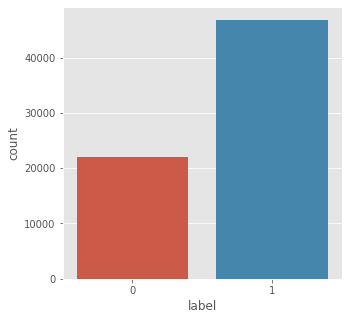

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

# ***Extra not needed***

---



In [ ]:
tweet_dfnow=tweet_df

In [ ]:
data = pd.read_csv('/content/data.csv', sep='\t', header=None)

In [ ]:
data.columns=['id','tweet','label']

In [ ]:
data.pop('id')

In [ ]:
data

In [ ]:
data['label'].iloc[0]

'none'

In [ ]:
#data_lbl=data[data['label']=='none']

In [ ]:
#data.shape[0]

In [ ]:
data.head()

In [ ]:
datas=data

In [ ]:
datas.head()

In [ ]:
for i in range(data.shape[0]):
  if data['label'].iloc[i]=='none':
    data['label'].iloc[i]=0
  else:
    data['label'].iloc[i]=1


In [ ]:
print(data)

                                                   tweet label
0      RT @colonelkickhead: Another bloody instant re...     0
1      @azzamalirhabi @JihadiA8 This video of the Pes...     0
2      Oh really? No more instant restaurants? THAT'S...     0
3      RT @Benfrancisallen: It hasn't been a good few...     0
4      RT @NoToFeminism: I don’t need femisnsn becaus...     0
...                                                  ...   ...
16045  RT @MyDearWormwood: "I want equal rights, but ...     1
16046  RT @alexxxarich: Go ahead and call me sexist b...     1
16047  @iRTsuki i've had the epic, but i always kept ...     0
16048  @Colonel_Shami So do you think that the Daesh ...     0
16049  RT @infosec_Hulk: @freebsdgirl MY SKIN GREEN. ...     0

[16050 rows x 2 columns]


In [ ]:
data2=data[data['label']==1]


In [ ]:
tweet_dfnow.head()

,label,tweet
0,0,yeah got 2 backups hate happen strugglin week ...
1,0,hate using bb love iphone havent tried new bb ...
2,1,get fucking real dude
3,1,dirty come crook rengel dems fucking corrupt j...
4,1,fuck could day lets hour ping later sched writ...


In [ ]:
data2.head()

,tweet,label
6,@DianH4 @ExposeFalsehood And it is Muslims who...,1
7,@truaemusic @mattybboi83 @Number10gov Capital ...,1
8,RT @fruitondabottom: #FeminismisEQUALITYwhen M...,1
13,".@GRIMACHU Sounds a bit too much like ""separat...",1
17,@LifeInKhilafah You are right. The violent mur...,1


In [ ]:
tweet_df= pd.concat([tweet_dfnow,data2])

In [ ]:
tweet_df['label'].value_counts()

1    9424
0    6198
Name: label, dtype: int64

In [ ]:
#data1=pd.read_csv('/content/formspring_data_1.csv')

In [ ]:
#data1.columns

Index(['userid\tpost\tques\tans\tasker\tans1\tseverity1\tans2\tseverity2\tans3\tseverity3'], dtype='object')